In [464]:
from random import random
import numpy as np

In [465]:
def get_line_from_perceptron_weight(w):
    x = [0, 1]
    y = [-w[2]/w[1], (-w[2]-w[0])/w[1]]
    return (x, y)

def get_real_separator_line(line):
    x = [0, 1]
    y = [line[0], line[0] + line[1]]
    return (x, y)

In [466]:
import matplotlib.pyplot as plt
import time
from IPython import display

def update_plot(x, y, mask, line, w):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.set_ylim([0,1])
    ax1.set_xlim([0,1])

    ax1.scatter(x[labels], y[labels], s=30, c='b', marker='+')
    ax1.scatter(x[~labels],y[~labels], s=30, c='r', marker="+")

    lx, ly  = get_real_separator_line(line)
    ax1.plot(lx, ly, 'g', lw=2)

    lx, ly = get_line_from_perceptron_weight(w)
    ax1.plot(lx, ly, 'k', lw=2)

    plt.show()

In [467]:
def predictions(x, y, m, w):
    return (np.inner(np.array([x, y, 1]), w) > 0) == m

def update_w(w, x1, x2, cl):
    return w + (1 if cl else -1)*np.array([x1, x2, 1])

In [468]:
def get_random_points(n):
    x=np.random.rand(n)
    y=np.random.rand(n)
    return x,y

def get_random_labels(x,y):
    labels = np.array(True)
    while(labels.all() or not mask.any()):
        a = np.random.rand(1)
        b = np.random.rand(1)
        labels = np.array([y > b*x + a for x,y in zip(x,y)]).flatten()
    return labels, [a[0], b[0]]

def get_initial_w():
#     w = np.array([0, 0 , 0])
    w = np.array([-0.5, -0.5 , 0.5])
    return w

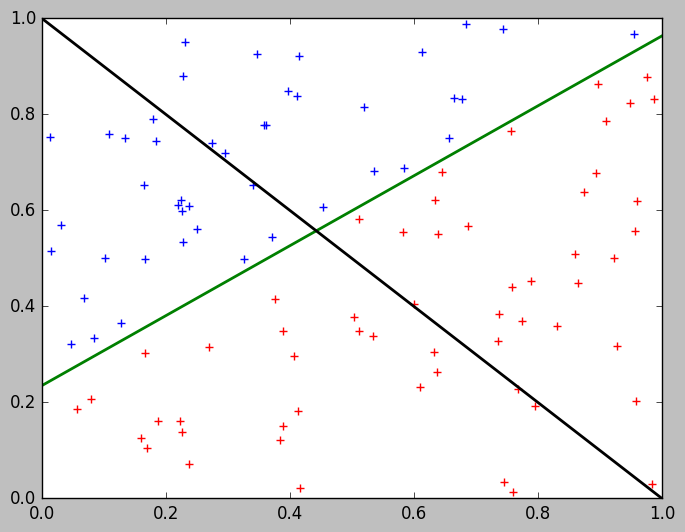

In [482]:
# def run_experiment(n):
n=100
x, y = get_random_points(n)
labels, line = get_random_labels(x,y)
w = get_initial_w()
update_plot(x, y, labels, line, w)

NameError: name 'labels' is not defined

In [ ]:
def train_perceptron(x, y, mask, ):
    

IndexError: too many indices for array

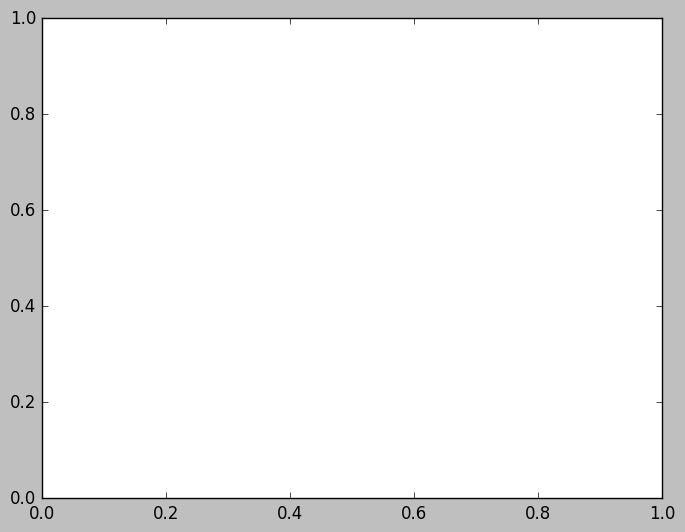

In [54]:
w = np.array([10*random(), 10*random(), 10*random()])

converged=False

for i in range(1000):
    if converged==True:
        break
    
    display.clear_output(wait=True)
    update_plot(x, y, w)
    time.sleep(0.05)
    
    converged=True
    for k in range(N):
        if is_misclassified(x[k], y[k], mask[k], w):
            w = update_w(w, x[k], y[k], mask[k])
            converged=False
            
#             display.clear_output(wait=True)
#             update_plot(x, y, w)
#             time.sleep(1.0)
#             print(w)
#             break

print(w)

In [355]:
N = 100

s = 0
missed = 0
cnt = 0
runs = 100000
max_iter = 100000


for l in range(runs):
    converged=False

        
    w = np.array([0, 0 , 0])

    for i in range(max_iter):
        if converged==True:
            break

        converged=True
        
        for k in range(N):
            predictions =is_misclassified(x[k], y[k], mask[k], w):
                w = update_w(w, x[k], y[k], mask[k])
                converged=False
    s = s + i

print(s/runs)
# print(missed)

SyntaxError: invalid syntax (<ipython-input-355-00a6e428c11c>, line 23)